# Business Understanding

## Project Domain

Domain: Burger King Menu Nutrition Data<br>
Sub-Domain: Fast Food Menu Intelligence

Sistem analisis data nutrisi ini berada dalam bidang food analytics yang memanfaatkan data science untuk mengevaluasi dan memahami kandungan gizi dari berbagai menu makanan cepat saji. Dengan menganalisis elemen-elemen seperti kalori, protein, lemak, dan karbohidrat, perusahaan dapat memberikan informasi gizi yang transparan bagi konsumen serta mengembangkan produk dengan keseimbangan nutrisi yang lebih baik.



## Problem Statements

Masalah yang Dihadapi:

1. Kurangnya Transparansi Informasi Gizi

- Banyak pelanggan kesulitan memahami komposisi gizi dari menu makanan cepat saji karena informasi disajikan dalam format yang tidak intuitif.

- Informasi ini penting terutama bagi pelanggan yang memiliki kebutuhan khusus seperti diet rendah kalori, tinggi protein, atau pembatasan gula/lemak.

2. Sulitnya Mengelompokkan Produk Berdasarkan Kandungan Gizi

- Tidak adanya sistem klasifikasi atau analisis yang memungkinkan pengguna dengan mudah mengidentifikasi jenis makanan berdasarkan kategori nutrisi tertentu (misalnya: makanan tinggi protein, rendah karbohidrat, dll).

3. Ketidakefisienan dalam Pengembangan Menu Sehat oleh Perusahaan

- Perusahaan kesulitan memahami pola umum kandungan nutrisi yang dapat membantu mereka merancang ulang atau menciptakan menu yang lebih sehat dan sesuai permintaan pasar.

4. Kurangnya Insight untuk Konsumen dan Tim Pemasaran

- Tanpa adanya analisis visual dan model prediktif, perusahaan kesulitan memberikan rekomendasi produk atau kampanye pemasaran berbasis preferensi nutrisi pelanggan.

## Goals

1. Membangun Sistem Analisis Nutrisi Menu yang Informatif

- Mengembangkan sistem yang mampu mengelompokkan menu berdasarkan kandungan nutrisi utama seperti kalori, protein, dan lemak.

2. Menyediakan Visualisasi Data Nutrisi yang Mudah Dipahami

- Membantu pengguna memvisualisasikan kandungan gizi antar produk untuk memudahkan pengambilan keputusan makanan secara cepat dan akurat.

3. Mendukung Perusahaan dalam Riset dan Pengembangan Menu Sehat

- Memberikan insight berbasis data untuk pengembangan menu dengan keseimbangan nutrisi yang lebih baik dan sesuai preferensi pelanggan.

4. Memberdayakan Konsumen Melalui Informasi Gizi yang Relevan

- Memberikan rekomendasi item makanan berdasarkan kebutuhan gizi tertentu dari konsumen (misalnya: tinggi protein atau rendah lemak).

## Solution Statements

1. Exploratory Data Analysis (EDA)

- Melakukan eksplorasi dan pembersihan data untuk memahami distribusi nutrisi serta mengidentifikasi anomali pada data menu Burger King.

2. Segmentasi Produk Berdasarkan Kandungan Gizi

- Menggunakan metode klasterisasi atau klasifikasi untuk mengelompokkan menu ke dalam kategori seperti "Tinggi Kalori", "Rendah Lemak", atau "Seimbang".

3. Visualisasi Interaktif (Plotly / Seaborn)

- Menyediakan dashboard atau grafik interaktif yang memudahkan pengguna dalam menelusuri kandungan nutrisi antar item makanan.

4. Model Prediktif atau Rekomendasi Gizi

- Membangun model machine learning sederhana untuk memprediksi kategori makanan berdasarkan input kandungan nutrisi, atau menyarankan alternatif menu dengan kandungan gizi yang serupa namun lebih sehat.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mawardahsitifatimah","key":"d44a68b446ef6a7575f2d05c7a09f5ad"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download mattop/burger-king-menu-nutrition-data

Dataset URL: https://www.kaggle.com/datasets/mattop/burger-king-menu-nutrition-data
License(s): CC0-1.0


In [4]:
!mkdir burger-king-menu-nutrition-data
!unzip burger-king-menu-nutrition-data.zip -d burger-king-menu-nutrition-data
!ls burger-king-menu-nutrition-data

Archive:  burger-king-menu-nutrition-data.zip
  inflating: burger-king-menu-nutrition-data/burger-king-menu.csv  
burger-king-menu.csv


## Import Library yang dibutuhkan

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential, layers
from tensorflow.keras.optimizers import Adam

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('/content/burger-king-menu-nutrition-data.zip')

In [47]:
df.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
0,Whopper® Sandwich,1,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
1,Whopper® Sandwich with Cheese,1,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
2,Bacon & Cheese Whopper® Sandwich,1,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0
3,Double Whopper® Sandwich,1,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0
4,Double Whopper® Sandwich with Cheese,1,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0


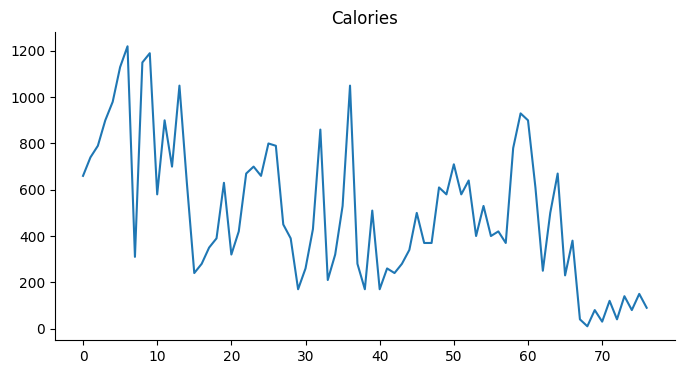

In [53]:
from matplotlib import pyplot as plt
df['Calories'].plot(kind='line', figsize=(8, 4), title='Calories')
plt.gca().spines[['top', 'right']].set_visible(False)

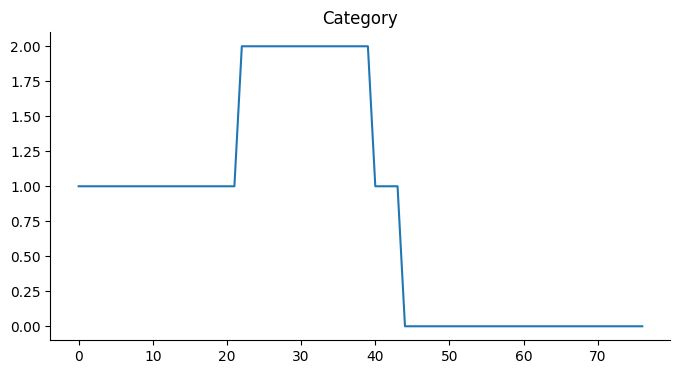

In [54]:
from matplotlib import pyplot as plt
df['Category'].plot(kind='line', figsize=(8, 4), title='Category')
plt.gca().spines[['top', 'right']].set_visible(False)

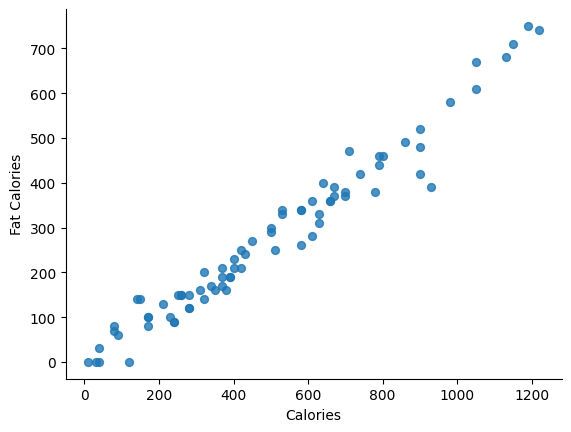

In [55]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Calories', y='Fat Calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

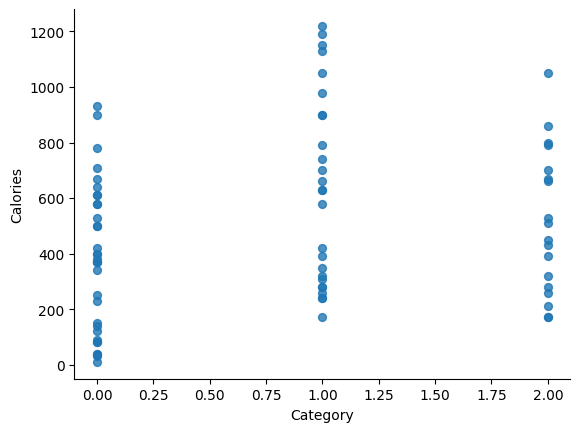

In [56]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Category', y='Calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

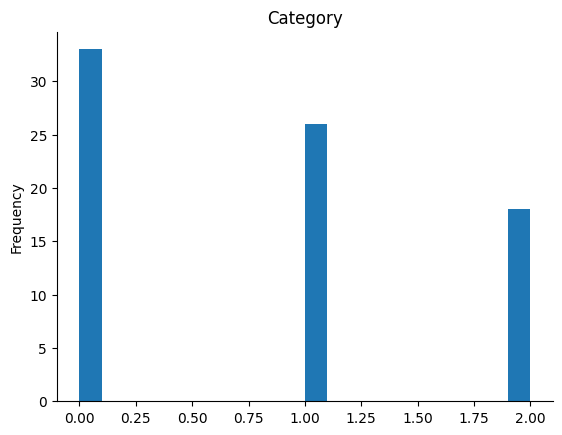

In [57]:
from matplotlib import pyplot as plt
df['Category'].plot(kind='hist', bins=20, title='Category')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Preparation

In [7]:
# Encode Category sebagai label (target)
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'].astype(str))

In [8]:
# Drop kolom yang tidak dipakai sebagai fitur
X = df.drop(columns=['Category', 'Item'])
y = df['Category']

In [9]:
# Pastikan hanya fitur numerik
X = X.select_dtypes(include=['float64', 'int64'])

In [12]:
# Normalisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Modeling

In [20]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,299 (141.80 KB)

 Trainable params: 12,099 (47.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,200 (94.54 KB)

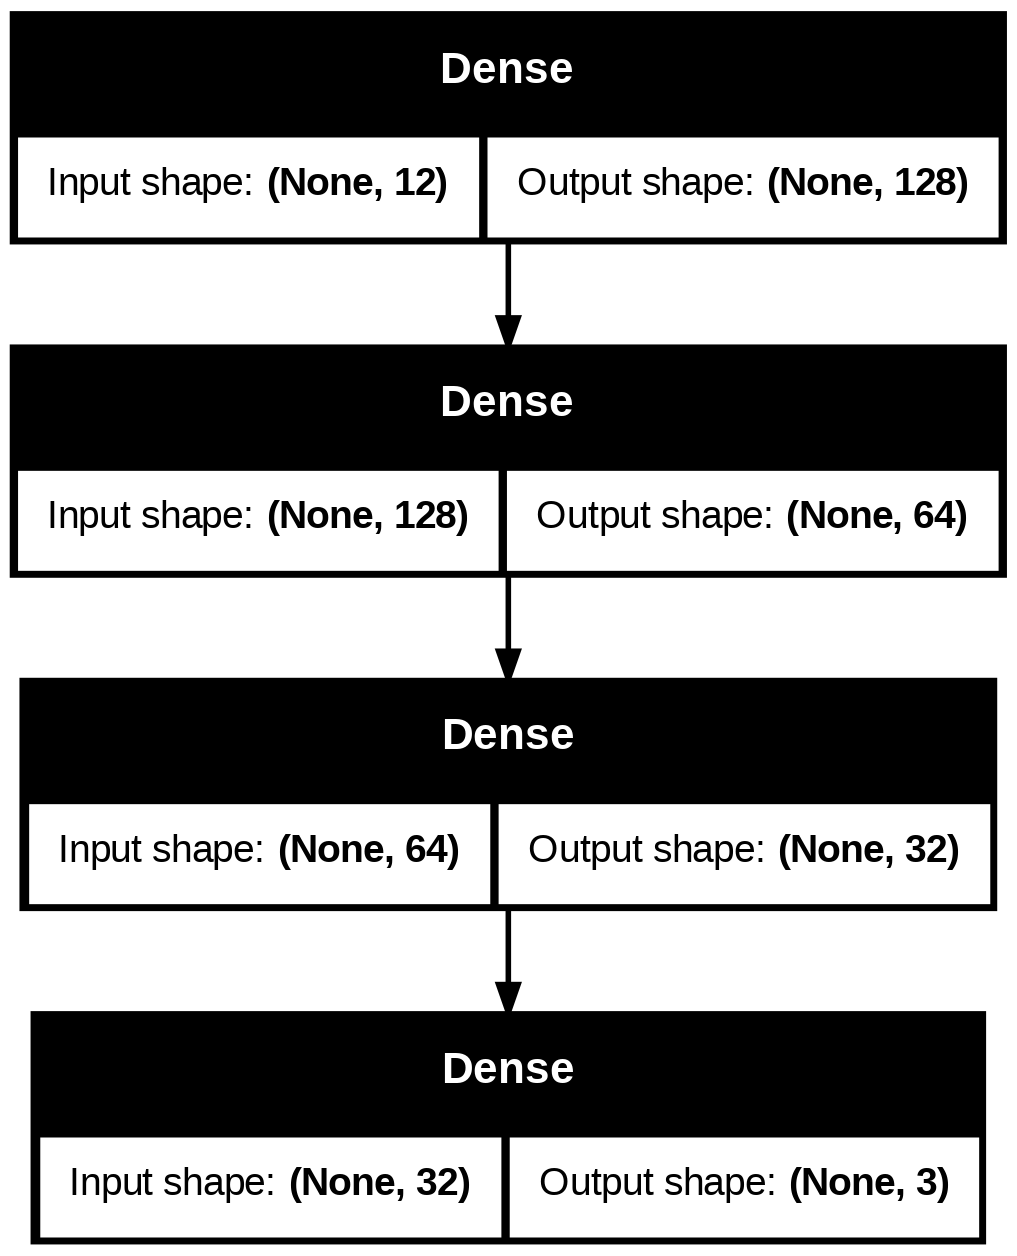

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [26]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9723 - loss: 0.0760 - val_accuracy: 0.8750 - val_loss: 0.5156
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9598 - loss: 0.0764 - val_accuracy: 0.8750 - val_loss: 0.5387
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9705 - loss: 0.1002 - val_accuracy: 0.8750 - val_loss: 0.5278
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9598 - loss: 0.0742 - val_accuracy: 0.8750 - val_loss: 0.5145
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9723 - loss: 0.0709 - val_accuracy: 0.8750 - val_loss: 0.5186
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9705 - loss: 0.0828 - val_accuracy: 0.8750 - val_loss: 0.5331
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9705 - loss: 0.0835 - val_accuracy: 0.8750 - val_loss: 0.5459
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9934 - loss: 0.0425 - val_accuracy: 0.8750 - val_loss: 0.5487


# Evaluation

In [27]:
# Evaluasi
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi: {acc:.4f}")
print(f"Loss: {loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8125 - loss: 0.7836
Akurasi: 0.8125
Loss: 0.7836


In [30]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

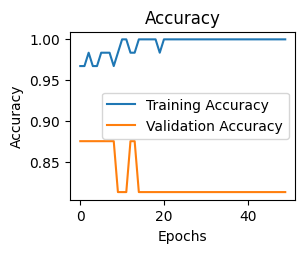

In [31]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

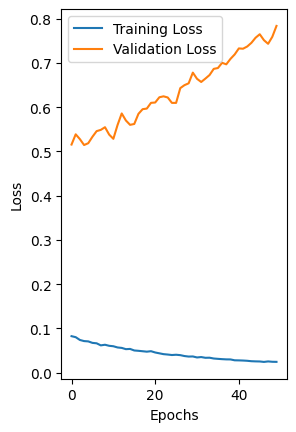

In [32]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


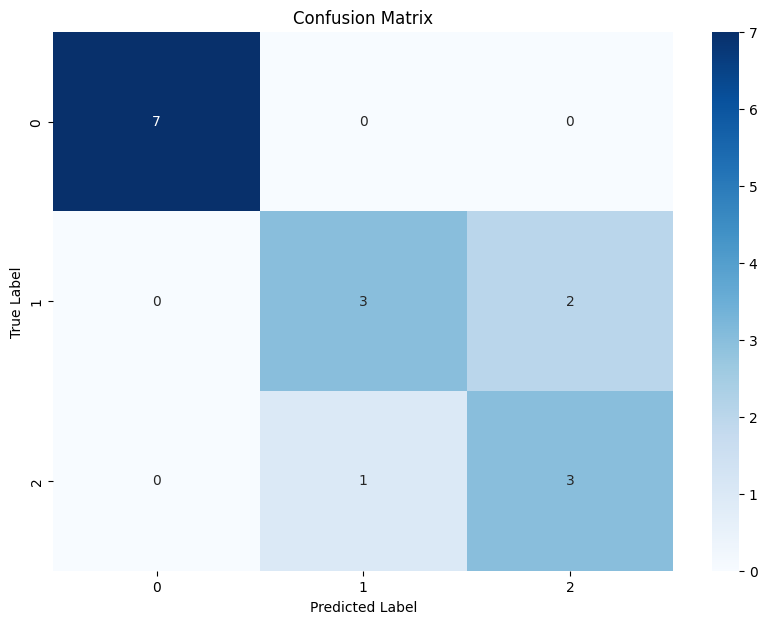

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      0.60      0.67         5
           2       0.60      0.75      0.67         4

    accuracy                           0.81        16
   macro avg       0.78      0.78      0.78        16
weighted avg       0.82      0.81      0.81        16



In [37]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [58]:
df.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
0,Whopper® Sandwich,1,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
1,Whopper® Sandwich with Cheese,1,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
2,Bacon & Cheese Whopper® Sandwich,1,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0
3,Double Whopper® Sandwich,1,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0
4,Double Whopper® Sandwich with Cheese,1,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0


In [59]:
sample_input = np.array([[310, 170, 19, 1, 30, 390, 27, 1, 7, 13, 8, 150]])
sample_input_df = pd.DataFrame(sample_input, columns=X.columns)

sample_input_scaled = scaler.transform(sample_input_df)

# Lakukan prediksi
prediction = model.predict(sample_input_scaled)
predicted_class = np.argmax(prediction)

# Konversi label numerik ke kategori asli
predicted_category = le.inverse_transform([predicted_class])

# Tampilkan hasil prediksi
print("=== Simulasi Model ===")
print(f"Predicted Category: {predicted_category[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
=== Simulasi Model ===
Predicted Category: Burgers


## Save Model

In [60]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('burger_king_pred.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmplo5kb_ym'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139294734252368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139294734246608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139294734251600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139294734251984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139294734247184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139294734251024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139294734253328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139294734243920: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [61]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']